In [1]:
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

import copy
import time
import os

In [2]:
# Using cascade mask rcnn as the predictor
cfg = get_cfg()
cfg.merge_from_file('./detectron_configs/Cityscapes/cascade_mask_rcnn_R_50_FPN_1x.yaml')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/detectron2/Misc/cascade_mask_rcnn_R_50_FPN_1x/138602847/model_final_e9d89b.pkl"
predictor = DefaultPredictor(cfg)

WARNING [11/11 19:39:42 d2.config.compat]: Config './detectron_configs/Cityscapes/cascade_mask_rcnn_R_50_FPN_1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [3]:
# Constants
DATA_DIR = 'data'
DOWNLOAD_DIR = 'raw'
IMAGE_PATH = os.path.join(os.getcwd(), DATA_DIR, DOWNLOAD_DIR)

img_paths = [os.path.join(IMAGE_PATH, img_name) for img_name in os.listdir(IMAGE_PATH)]

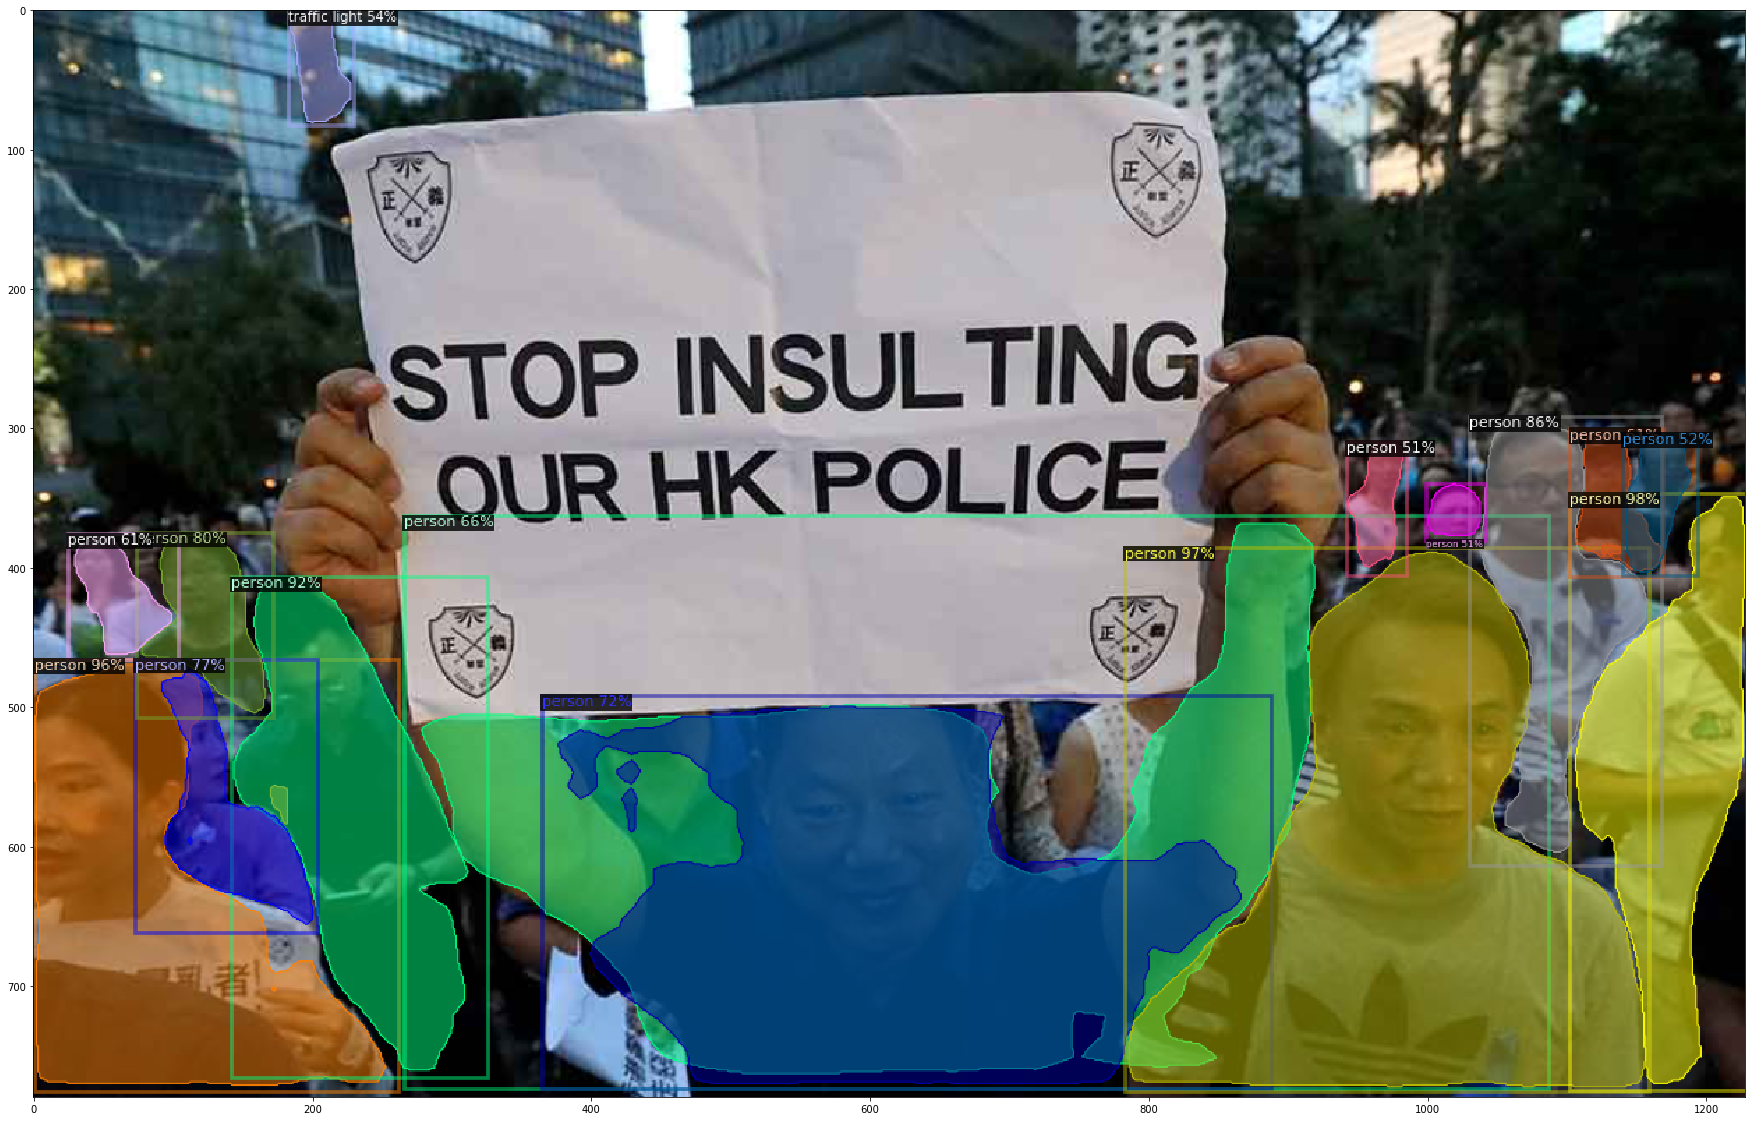

In [4]:
# Test running one image through the predictor and showing the result
try:
    im = cv2.imread(img_paths[0])
except Exception as e:
    print(e)
outputs = predictor(im)
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to('cpu'))
plt.figure(figsize = (200,20))
plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))